## **Python @staticmethod**

There can be some functionality that relates to the class, but does not require any instance(s) to do some work, static methods can be used in such cases. A static method is a method which is bound to the class and not the object of the class. It can’t access or modify class state. It is present in a class because it makes sense for the method to be present in class. A static method does not receive an implicit first argument.

When function decorated with @staticmethod is called, we don’t pass an instance of the class to it as it is normally done with methods. It means that the function is put inside the class but it cannot access the instance of that class.

>**Problem Statement**


Let us assume that in our online shopping app, we want to provide a limited 50% flat off on all mobile phones.



How can we write our code so that all mobile objects get a 50% off? One solution is to create a discount attribute and hard code the value as 50% as shown below:

In [ ]:
class Mobile:
  def __init__(self,brand,price):
    self.brand = brand
    self.price = price
    self.discount = 50

  def purchase(self):
    total_price = self.price - self.price * self.discount/100
    print("Mobile with price",self.price,"is available after discount at",total_price)

mob1=Mobile( "Apple",20000)
mob2=Mobile( "Apple",30000)
mob3=Mobile( "Samsung",5000)

mob1.purchase()
mob2.purchase()


Mobile with price 20000 is available after discount at 10000.0
Mobile with price 30000 is available after discount at 15000.0


However, the solution of hardcoding the value in the attribute is not a good one. For example, since this is a limited time discount we should be able to programmatically enable and disable the discount using functions like this:

In [ ]:
class Mobile:
  def __init__(self,brand,price):
    self.brand = brand
    self.price = price
    self.discount = 0

  def purchase(self):
    total_price = self.price - self.price * self.discount/100
    print("Mobile with price",self.price,"is available after discount at",total_price)


# out side of class
def enable_discount():
    for mobiles in list_of_mobiles:
      mobiles.discount = 50

def disable_discount():
    for mobiles in list_of_mobiles:
      mobiles.discount = 0

mob1=Mobile("Apple",20000)
mob2=Mobile( "Apple",30000)
mob3=Mobile( "Samsung",5000)
mob4=Mobile("Samsung",6000)

list_of_mobiles = [mob1,mob2,mob3,mob4]

mob1.purchase()
enable_discount(list_of_mobiles)
mob2.purchase()
mob3.purchase()
print("after disable discount...closed")
disable_discount(list_of_mobiles)
mob4.purchase()


Mobile with price 20000 is available after discount at 20000.0
Mobile with price 30000 is available after discount at 15000.0
Mobile with price 5000 is available after discount at 2500.0
after disable discount...closed
Mobile with price 6000 is available after discount at 6000.0


However, in our current approach, each object has discount as an attribute. If we change the value for one object, it does not affect the other object. If we have to change, we have to change for all the objects, one by one.

What we need is a way to make an attribute shared across objects. The data is shared by all objects, not owned by each object. Thus, by making a single change, it should reflect in all objects at one go.

here were static comes into picture

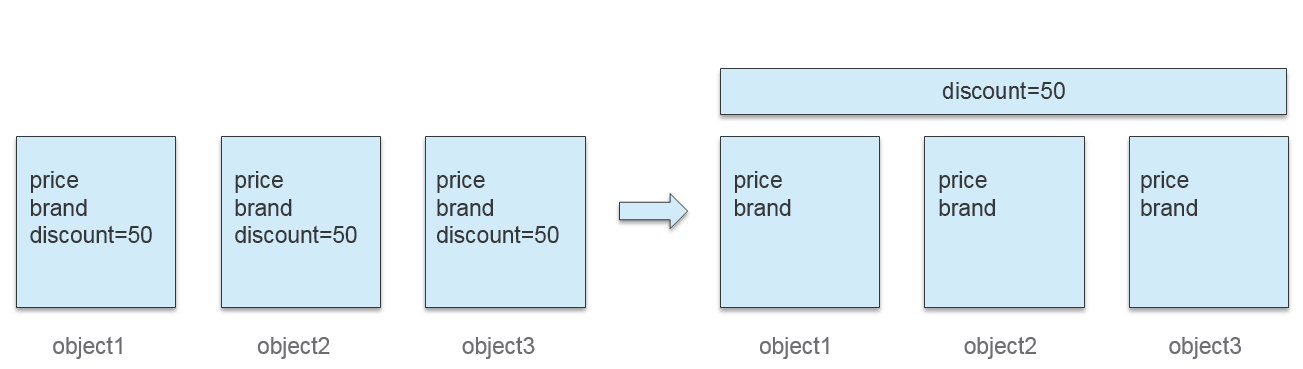

We can create shared attributes by placing them directly inside the class and not inside the constructor. And since this attribute is not owned by any one object, we don’t need the self to create this attribute. Such variables which are created at a class level are called static variables. Here discount is a static value.

In [ ]:
class Mobile:
  discount = 50
  def __init__(self,brand,price):
    self.brand = brand
    self.price = price

>**Problem Statement**


Now that we have created static variables, we can access them using the Class name itself. Static variable belong to the class and not an object. Hence we don’t need self to access static variables.



In [ ]:
class Mobile:
    discount = 50
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand

    def purchase(self):
        total = self.price - self.price * Mobile.discount / 100
        print (self.brand, "mobile with price", self.price, "is available after discount at", total)

mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")

mob1.purchase()
mob2.purchase()
mob3.purchase()


Apple mobile with price 20000 is available after discount at 10000.0
Apple mobile with price 30000 is available after discount at 15000.0
Samsung mobile with price 5000 is available after discount at 2500.0


>**note:**  we can update the static values using class name

In [ ]:
class Mobile:
    discount = 0
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand

    def purchase(self):
        total = self.price - self.price * Mobile.discount / 100
        print (self.brand, "mobile with price", self.price, "is available after discount at", total)


def enable_discount():
  Mobile.discount=50

def disable_discount():
  Mobile.discount=0



mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")

mob1.purchase()
print("enabling....discount..")
enable_discount()
mob2.purchase()
mob1.purchase()
print("disableing....discount..")
mob3.purchase()

Apple mobile with price 20000 is available after discount at 20000.0
enabling....discount..
Apple mobile with price 30000 is available after discount at 15000.0
Apple mobile with price 20000 is available after discount at 10000.0
disableing....discount..
Samsung mobile with price 5000 is available after discount at 2500.0


>**static vs Reference variable**

Static variables belong to the class and hence it is incorrect to access them or update them using the reference variable or self. Doing so may cause unexpected consequences in the code and should be refrained from. If you are interested to understand what happens when static variables are accessed through reference variables, read the appendix as additional learning.

>**Problem Statement**


We can make our static variable as a private variable by adding a double underscore in front of it. We can also create getter and setter methods to access or modify it.

In [ ]:
class Mobile:
    __discount = 0

    def __init__(self, price, brand):
        self.price = price
        self.brand = brand
    #getters& setters
    @property
    def discount(self):
      return self.__discount
    @discount.setter
    def discount(self,discount):
      self.__discount = discount

    def purchase(self):
        total = self.price - self.price * self.discount / 100
        print (self.brand, "mobile with price", self.price, "is available after discount at", total)


def enable_discount():
  Mobile.discount = 50

def disable_discount():
  Mobile.discount=0



mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")

mob1.purchase()
print("enabling....discount..")
enable_discount()
mob2.purchase()
mob1.purchase()
print("disableing....discount..")
mob3.purchase()

Apple mobile with price 20000 is available after discount at 20000.0
enabling....discount..
Apple mobile with price 30000 is available after discount at 15000.0
Apple mobile with price 20000 is available after discount at 10000.0
disableing....discount..
Samsung mobile with price 5000 is available after discount at 2500.0


>**need of statci Method**

**Problem Statement**

In the below code we are invoking the getter method using a reference variable. But the self is not used inside the method at all.

In [ ]:
class Mobile:
    __discount = 50
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand

    def purchase(self):
        total = self.price - self.price * Mobile.__discount / 100
        print ("Total is ",total)

    def get_discount(self): # here we didn't use this self at all.
        return Mobile.__discount

    def set_discount(self,discount): # here we didn't use this self at all.
        Mobile.__discount = discount

mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")

print(mob1.get_discount())


50


>**Static Method Intro**

Since static variable is object independent, we need a way to access the getter setter methods without an object. This is possible by creating static methods. Static methods are those methods which can be accessed without an object. They are accessed using the class name.

There are two rules in creating such static methods:
* The methods should not have self
* @staticmethod must be written on top of it

In [ ]:
@staticmethod
def get_discount():
    return Mobile.__discount
@staticmethod
def set_discount(discount):
    Mobile.__discount=discount


>**Accessing static Methods**

In [ ]:
class Mobile:
    __discount = 0

    def __init__(self, price, brand):
        self.price = price
        self.brand = brand
    #getters& setters
    @property
    def discount(self):
      return self.__discount
    @discount.setter
    def discount(self,discount):
      self.__discount = discount

    # methods

    @staticmethod
    def enable_discount():
      Mobile.discount = 50
    @staticmethod
    def disable_discount():
      Mobile.discount=0

    def purchase(self):
        total = self.price - self.price * self.discount / 100
        print (self.brand, "mobile with price", self.price, "is available after discount at", total)




mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")
# access the ststics methods without even creating objects
mob1.purchase()
print("enabling....discount..")

Mobile.enable_discount() # access of static methods with class name
mob2.purchase()
mob1.purchase()
Mobile.disable_discount() # access of static methods with class name
print("disableing....discount..")
mob3.purchase()

Apple mobile with price 20000 is available after discount at 20000.0
enabling....discount..
Apple mobile with price 30000 is available after discount at 15000.0
Apple mobile with price 20000 is available after discount at 10000.0
disableing....discount..
Samsung mobile with price 5000 is available after discount at 5000.0


we can acess the atatic method by using class name


Mega sale problem compleate solution

In [ ]:
class Mobile:
    __discount = 0

    def __init__(self, price, brand):
        self.price = price
        self.brand = brand
    #getters& setters
    @property
    def discount(self):
      return self.__discount
    @discount.setter
    def discount(self,discount):
      self.__discount = discount

    # methods

    @staticmethod
    def enable_discount():
      Mobile.discount = 50
    @staticmethod
    def disable_discount():
      Mobile.discount = 0

    def purchase(self):
        total = self.price - self.price * self.discount / 100
        print (self.brand, "mobile with price", self.price, "is available after discount at", total)



mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")
# access the ststics methods without even creating objects
mob1.purchase()
print("enabling....discount..")

Mobile.enable_discount() # access of static methods with class name
mob2.purchase()
mob1.purchase()
Mobile.disable_discount() # access of static methods with class name
print("disableing....discount..")
mob3.purchase()

Apple mobile with price 20000 is available after discount at 20000.0
enabling....discount..
Apple mobile with price 30000 is available after discount at 15000.0
Apple mobile with price 20000 is available after discount at 10000.0
disableing....discount..
Samsung mobile with price 5000 is available after discount at 5000.0


>**Static Counter**

**Problem Statement**

Let us say we want to assign a unique number to each mobile object. The first object should be given a number 1000 and subsequent objects should have that value increased by 1. We can accomplish this by using a combination of static and instance variables as shown below:

In [ ]:
class Mobile:
    counter = 1000
    def __init__(self, price, brand):
        self.price = price
        self.brand = brand
        self.mobile_id = Mobile.counter
        Mobile.counter += 1

mob1=Mobile(20000, "Apple")
mob2=Mobile(30000, "Apple")
mob3=Mobile(5000, "Samsung")

print("mobile_id for mob1 is", mob1.mobile_id)
print("mobile_id for mob2 is", mob2.mobile_id)
print("mobile_id for mob3 is", mob3.mobile_id)

print("Current value of counter is", Mobile.counter)


mobile_id for mob1 is 1000
mobile_id for mob2 is 1001
mobile_id for mob3 is 1002
Current value of counter is 1003


>**Summary:**

* Static attributes are created at class level.
* Static attributes are accessed using ClassName.
* Static attributes are object independent. We can access them without creating instance (object) of the class in which they are defined.
* The value stored in static attribute is shared between all instances(objects) of the class in which the static attribute is defined.